<a href="https://colab.research.google.com/github/banteamlak1888/Programming-and-Algorithms-Course/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                 **Banteamlak Begashaw** *ID.NO SGSR/0035/16*

**Knowledge Discovery tools and Techniques Assignment**      
*   Data Preprocessing










**Several Liberarys**
---


*   pandas (Data Manipulation and Analysis):Enables efficient handling and manipulation of structured data.
*   numpy (Numerical Operations on Arrays): Allows efficient numerical computations on large arrays and matrices
 .

*  matplotlib.pyplot and seaborn (Data Visualization) Advantage of matplotlib.
*  pyplot: Provides control over every part of a plot.

*  pyplot: Provides control over every part of a plot.
*   Advantage of seaborn: Simplifies statistical data visualization.


*   LabelEncoder (Label Encoding):Converts categorical labels into numeric labels, useful for ML models that require numeric input.
*  StandardScaler and MinMaxScaler (Feature Scaling) Advantage of StandardScaler: Normalizes data to have a mean of 0 and standard deviation of 1, which is beneficial for algorithms sensitive to scale.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats
import datetime
from scipy.stats.mstats import winsorize
from category_encoders import TargetEncoder
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from category_encoders import TargetEncoder, LeaveOneOutEncoder
from sklearn.model_selection import train_test_split


 **Load the Dataset**
*Load an Excel file named "RTA.xlsx" with pandastep*

In [ ]:
file_path = '/RTA.xlsx'
data = pd.read_excel(file_path)

**Overview of the Data**

In [ ]:
data = pd.read_excel(file_path)

***View first few rows and Last few row by default***

In [ ]:
data.head()

,S/N0,time,day,driv_age,sex,driv_expe,type_of_vehcle,service_year,location,road_cond,light_cond,weather_cond,casuality_class,causality_age,causality_sex,severity
0,1,20:00:00,Saturday,27.0,male,6.0,bus,9.0,orgn,dry,darkness,cold,NaN,52.0,male,serious
1,2,20:00:00,Saturday,40.0,male,NaN,automobile,24.0,orgn,dry,darkness,cold,NaN,32.0,male,serious
2,3,10:30:00,Thursday,27.0,male,NaN,truck,3.0,orgn,dry,daylight,sunlight,pedistrian,20.0,male,serious
3,4,NaN,Saturday,27.0,male,NaN,truck,10.0,market,dry,daylight,cold,prodamage,55.0,male,serious
4,5,08:10:00,Sunday,45.0,male,NaN,automobile,10.0,Station,dry,daylight,sunlight,pedistrian,25.0,male,serious


*df.tail(): Displays the last 5 rows of the DataFrame by default. This can help you see the end of the dataset, which can be useful if there are any end-of-file artifacts or if you want to check how the data concludes*

In [ ]:
data.tail()

,S/N0,time,day,driv_age,sex,driv_expe,type_of_vehcle,service_year,location,road_cond,light_cond,weather_cond,casuality_class,causality_age,causality_sex,severity
105,106,17:30:00,Monday,30.0,male,9.0,bus,1.0,orgn,dry,daylight,good,prodamage,30.0,male,serious
106,107,12:05:00,Tuesday,32.0,male,3.0,bus,10.0,orgn,dry,daylight,good,prodamage,21.0,male,serious
107,108,22:00:00,Thursday,26.0,male,5.0,automobile,10.0,orgn,dry,nightlight,good,prodamage,23.0,male,serious
108,109,10:30:00,Monday,37.0,male,5.0,automobile,10.0,orgn,dry,daylight,good,prodamage,48.0,male,serious
109,110,14:00:00,Saturday,45.0,male,30.0,automobile,1.0,market,dry,daylight,good,prodamage,51.0,male,serious


In [ ]:
data.describe()

,S/N0,driv_age,driv_expe,service_year,causality_age
count,110.000000,104.000000,76.000000,96.000000,103.000000
mean,55.500000,34.278846,9.592105,9.500000,39.038835
std,31.898276,10.351546,7.831862,4.523622,16.004241
min,1.000000,16.000000,0.000000,1.000000,7.000000
25%,28.250000,27.000000,5.000000,9.750000,28.000000
50%,55.500000,31.000000,7.000000,10.000000,35.000000
75%,82.750000,40.000000,10.000000,10.000000,50.000000
max,110.000000,59.000000,35.000000,25.000000,85.000000


*Displaying the shape of our dataset, how many rows and columns we have.*

In [ ]:
data_shape = data.shape
print(data_shape)

(110, 16)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S/N0             110 non-null    int64  
 1   time             106 non-null    object 
 2   day              110 non-null    object 
 3   driv_age         104 non-null    float64
 4   sex              106 non-null    object 
 5   driv_expe        76 non-null     float64
 6   type_of_vehcle   99 non-null     object 
 7   service_year     96 non-null     float64
 8   location         106 non-null    object 
 9   road_cond        107 non-null    object 
 10  light_cond       104 non-null    object 
 11  weather_cond     110 non-null    object 
 12  casuality_class  94 non-null     object 
 13  causality_age    103 non-null    float64
 14  causality_sex    105 non-null    object 
 15  severity         108 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 13.9+ KB


*df.isnull().sum(): Returns the count of missing (null) values for each column in the DataFrame.*

In [ ]:
data.isnull().sum()

,0
S/N0,0
time,4
day,0
driv_age,6
sex,4
driv_expe,34
type_of_vehcle,11
service_year,14
location,4
road_cond,3


**Visualize your actual datase** *Categorical Variables Analysis*

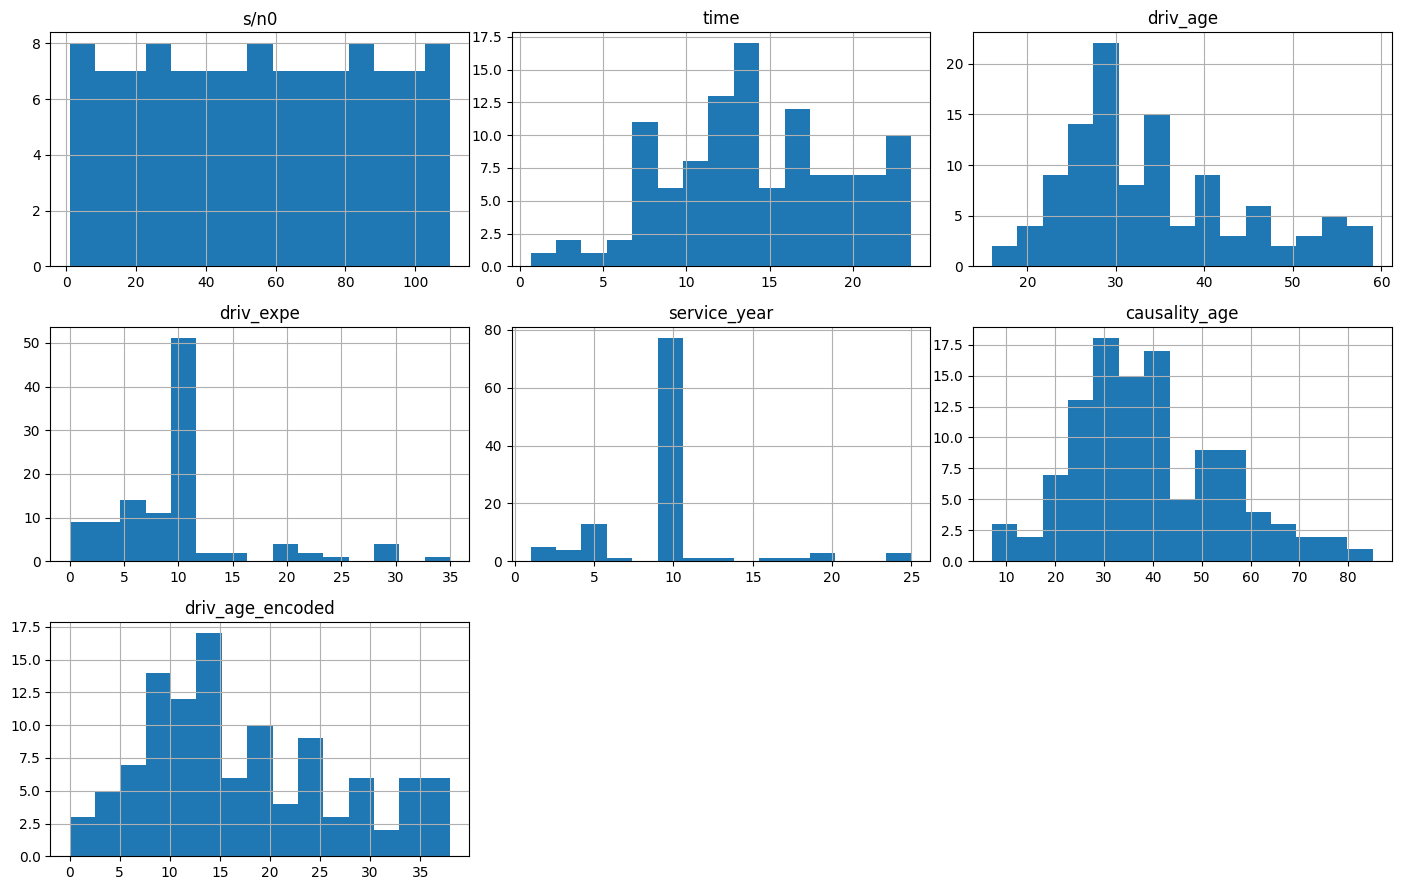

In [ ]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
data[numerical_cols].hist(bins=15, figsize=(14, 9), layout=(3, 3))
plt.tight_layout()
plt.show()

*Numerical Variables Analysis*

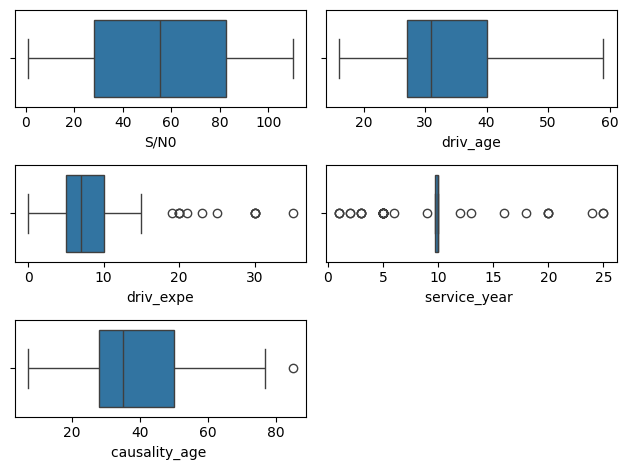

In [ ]:
df = data  # Assign data to df
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()

**preprosessing steps in data science**
*  Data Cleaning*
*  Missing Data Management
*  Noise Treatment
*  Class Imbalance Management
*  Feature Encoding
*  Feature Scaling
* Correlation Analysis or Feature Selection


# **1.Data** **Cleaning**

In [ ]:
data = data.drop_duplicates()

*Drop the first column by index*

In [ ]:
ata = data.drop(data.columns[0], axis=1)

***Check columns***

In [ ]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['S/N0', 'time', 'day', 'driv_age', 'sex ', 'driv_expe',
       'type_of_vehcle', 'service_year ', 'location', 'road_cond',
       'light_cond', 'weather_cond ', 'casuality_class', 'causality_age ',
       'causality_sex', 'severity '],
      dtype='object')


In [ ]:
data_selected = data.head(110)

**Display the missing values**

In [ ]:
missing_values = data_selected.isnull().sum()
print("Missing Values in the first 110 rows:")
print(missing_values)

Missing Values in the first 110 rows:
S/N0                0
time                4
day                 0
driv_age            6
sex                 4
driv_expe          34
type_of_vehcle     11
service_year       14
location            4
road_cond           3
light_cond          6
weather_cond        0
casuality_class    16
causality_age       7
causality_sex       5
severity            2
dtype: int64


*Display the **percentage** of missing values*


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = data_selected.isnull().mean() * 100
print("Percentage of Missing Values in the first 110 rows:")
print(missing_percentage)

Percentage of Missing Values in the first 110 rows:
S/N0                0.000000
time                3.636364
day                 0.000000
driv_age            5.454545
sex                 3.636364
driv_expe          30.909091
type_of_vehcle     10.000000
service_year       12.727273
location            3.636364
road_cond           2.727273
light_cond          5.454545
weather_cond        0.000000
casuality_class    14.545455
causality_age       6.363636
causality_sex       4.545455
severity            1.818182
dtype: float64


**2.Missing Data Management**: Address any missing values first, as they can distort analyses and model performance. You might choose to impute, remove, or flag missing data, depending on the dataset and context.

# **Fill Missing Values using Backward Fill**

In [ ]:
#Fill Missing Values using Backward Fill
data_filled_backward = data_selected.fillna(method='bfill')

print("DataFrame after filling missing values:")
print(data)

DataFrame after filling missing values:
     S/N0      time        day  driv_age  sex   driv_expe type_of_vehcle  \
0       1  20:00:00  Saturday       27.0  male   6.000000            bus   
1       2  20:00:00  Saturday       40.0  male   9.592105     automobile   
2       3  10:30:00   Thursday      27.0  male   9.592105          truck   
3       4  14:00:00  Saturday       27.0  male   9.592105          truck   
4       5  08:10:00    Sunday       45.0  male   9.592105     automobile   
..    ...       ...        ...       ...   ...        ...            ...   
105   106  17:30:00    Monday       30.0  male   9.000000            bus   
106   107  12:05:00    Tuesday      32.0  male   3.000000            bus   
107   108  22:00:00   Thursday      26.0  male   5.000000     automobile   
108   109  10:30:00    Monday       37.0  male   5.000000     automobile   
109   110  14:00:00  Saturday       45.0  male  30.000000     automobile   

     service_year  location road_cond  light_co

<ipython-input-26-36dacd5efe33>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_backward = data_selected.fillna(method='bfill')


# **Fill Missing Values using Interpolation**

In [ ]:
#Fill Missing Values using Interpolation
data_filled_interpolated = data_filled_backward.interpolate()
print("DataFrame after filling missing values:")
print(data)

DataFrame after filling missing values:
     S/N0      time        day  driv_age  sex   driv_expe type_of_vehcle  \
0       1  20:00:00  Saturday       27.0  male   6.000000            bus   
1       2  20:00:00  Saturday       40.0  male   9.592105     automobile   
2       3  10:30:00   Thursday      27.0  male   9.592105          truck   
3       4  14:00:00  Saturday       27.0  male   9.592105          truck   
4       5  08:10:00    Sunday       45.0  male   9.592105     automobile   
..    ...       ...        ...       ...   ...        ...            ...   
105   106  17:30:00    Monday       30.0  male   9.000000            bus   
106   107  12:05:00    Tuesday      32.0  male   3.000000            bus   
107   108  22:00:00   Thursday      26.0  male   5.000000     automobile   
108   109  10:30:00    Monday       37.0  male   5.000000     automobile   
109   110  14:00:00  Saturday       45.0  male  30.000000     automobile   

     service_year  location road_cond  light_co

<ipython-input-27-0bb4cf732bc2>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_filled_interpolated = data_filled_backward.interpolate()


# ***Check for any remaining missing values***

In [ ]:
missing_after_fill = data_filled_interpolated.isnull().sum()
# Display the remaining missing values
print("Missing Values after filling:")
print(missing_after_fill)

Missing Values after filling:
S/N0               0
time               0
day                0
driv_age           0
sex                0
driv_expe          0
type_of_vehcle     0
service_year       0
location           0
road_cond          0
light_cond         0
weather_cond       0
casuality_class    0
causality_age      0
causality_sex      0
severity           0
dtype: int64


# **Noise Treatment**

***Outlier Removal using IQR***

In [ ]:
# Step 1: Outlier Removal using IQR
Q1 = data_filled_interpolated.quantile(0.25)
Q3 = data_filled_interpolated.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

 #Remove outliers
data_no_outliers = data_filled_interpolated[~((data_filled_interpolated < lower_bound) | (data_filled_interpolated > upper_bound)).any(axis=1)]

if 'driv_age' in data_no_outliers.columns:
    data_no_outliers['driv_age'] = data_no_outliers['driv_age'].rolling(window=3, min_periods=1).mean()

<ipython-input-43-23895e4044f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['driv_age'] = data_no_outliers['driv_age'].rolling(window=3, min_periods=1).mean()


**Data after handling noise and outliers**

In [ ]:
#Print the cleaned DataFrame
print("Data after handling noise and outliers:")
print(data_no_outliers)

Data after handling noise and outliers:
     S/N0 time day   driv_age sex   driv_expe type_of_vehcle  service_year   \
0       1  NaT NaT  27.000000  NaT   6.000000            NaT            9.0   
3       4  NaT NaT  27.000000  NaT   9.592105            NaT           10.0   
4       5  NaT NaT  33.000000  NaT   9.592105            NaT           10.0   
7       8  NaT NaT  36.000000  NaT   9.592105            NaT           10.0   
8       9  NaT NaT  38.333333  NaT   9.592105            NaT            9.5   
..    ...  ...  ..        ...  ...        ...            ...            ...   
102   103  NaT NaT  29.759615  NaT   8.000000            NaT           10.0   
104   105  NaT NaT  30.426282  NaT   2.000000            NaT            9.5   
106   107  NaT NaT  29.666667  NaT   3.000000            NaT           10.0   
107   108  NaT NaT  29.333333  NaT   5.000000            NaT           10.0   
108   109  NaT NaT  31.666667  NaT   5.000000            NaT           10.0   

    locatio

 **Winsorization**

In [ ]:
# Winsorization limits to control extreme values
from scipy.stats.mstats import winsorize
data_no_outliers = data_no_outliers.apply(lambda x: winsorize(x, limits=[0.05, 0.05]) if x.dtype in ['float64', 'int64'] else x)

# Print the cleaned DataFrame
print("\nCleaned DataFrame after outlier removal, smoothing, and winsorization:")
print(data_no_outliers)


Cleaned DataFrame after outlier removal, smoothing, and winsorization:
     S/N0 time day   driv_age sex   driv_expe type_of_vehcle  service_year   \
0       8  NaT NaT  27.000000  NaT   6.000000            NaT            9.5   
3       8  NaT NaT  27.000000  NaT   9.592105            NaT           10.0   
4       8  NaT NaT  33.000000  NaT   9.592105            NaT           10.0   
7       8  NaT NaT  36.000000  NaT   9.592105            NaT           10.0   
8       9  NaT NaT  38.333333  NaT   9.592105            NaT            9.5   
..    ...  ...  ..        ...  ...        ...            ...            ...   
102   103  NaT NaT  29.759615  NaT   8.000000            NaT           10.0   
104   105  NaT NaT  30.426282  NaT   2.000000            NaT            9.5   
106   105  NaT NaT  29.666667  NaT   3.000000            NaT           10.0   
107   105  NaT NaT  29.333333  NaT   5.000000            NaT           10.0   
108   105  NaT NaT  31.666667  NaT   5.000000            Na

# **Class Imbalance Management**

Proportions of each class in 'severity':
severity
serious    0.954545
fatal      0.045455
Name: proportion, dtype: float64


<ipython-input-108-ff5c257358e6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette='viridis')


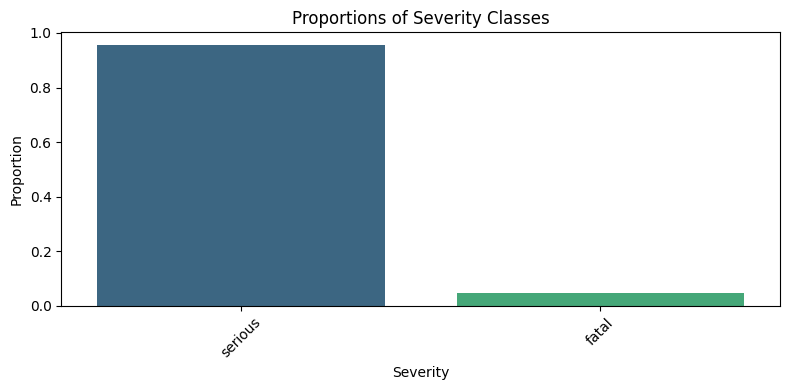

In [ ]:
# Step 1: Clean Column Names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
proportions = data['severity'].value_counts(normalize=True)

# Display the proportions
print("Proportions of each class in 'severity':")
print(proportions)

# Step 3: Create a Bar Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=proportions.index, y=proportions.values, palette='viridis')
plt.title('Proportions of Severity Classes')
plt.xlabel('Severity')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Encoding

In [ ]:
# Clean column names for better usability
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Display initial data
print("Initial Data:")
print(data.head())


Initial Data:
   s/n0      time        day  driv_age   sex  driv_expe type_of_vehcle  \
0     1  20:00:00  Saturday       27.0  male   6.000000            bus   
1     2  20:00:00  Saturday       40.0  male   9.592105     automobile   
2     3  10:30:00   Thursday      27.0  male   9.592105          truck   
3     4  14:00:00  Saturday       27.0  male   9.592105          truck   
4     5  08:10:00    Sunday       45.0  male   9.592105     automobile   

   service_year location road_cond light_cond weather_cond casuality_class  \
0           9.0     orgn       dry   darkness         cold       prodamage   
1          24.0     orgn       dry   darkness         cold       prodamage   
2           3.0     orgn       dry   daylight     sunlight      pedistrian   
3          10.0   market       dry   daylight         cold       prodamage   
4          10.0  Station       dry   daylight     sunlight      pedistrian   

   causality_age causality_sex severity  
0           52.0          male

**Leave-One-Out Encoding**

*is particularly useful in cross-validation setups to prevent data leakage. Be sure to apply it within the training phase to avoid using future information.*

In [ ]:
data = pd.DataFrame(data)
def time_to_float(t):
    if isinstance(t, datetime.time):
        total_hours = t.hour + t.minute / 60.0
        return total_hours
    else:
        return None

# Apply the conversion function to the time column
data['time'] = data['time'].apply(time_to_float)

print(data)

     s/n0       time        day  driv_age   sex  driv_expe type_of_vehcle  \
0       1  20.000000  Saturday       27.0  male   6.000000            bus   
1       2  20.000000  Saturday       40.0  male   9.592105     automobile   
2       3  10.500000   Thursday      27.0  male   9.592105          truck   
3       4  14.000000  Saturday       27.0  male   9.592105          truck   
4       5   8.166667    Sunday       45.0  male   9.592105     automobile   
..    ...        ...        ...       ...   ...        ...            ...   
105   106  17.500000    Monday       30.0  male   9.000000            bus   
106   107  12.083333    Tuesday      32.0  male   3.000000            bus   
107   108  22.000000   Thursday      26.0  male   5.000000     automobile   
108   109  10.500000    Monday       37.0  male   5.000000     automobile   
109   110  14.000000  Saturday       45.0  male  30.000000     automobile   

     service_year location road_cond  light_cond weather_cond casuality_cla

***Normalization***

*Normalization rescales the data to a fixed range \. This is useful when you want to ensure that all features contribute equally to the distance calculations.*


In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numerical data
data_normalized = data.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(data_normalized)


Normalized DataFrame:
         s/n0      time        day  driv_age   sex  driv_expe type_of_vehcle  \
0    0.000000  0.846715  Saturday   0.255814  male   0.171429            bus   
1    0.009174  0.846715  Saturday   0.558140  male   0.274060     automobile   
2    0.018349  0.430657   Thursday  0.255814  male   0.274060          truck   
3    0.027523  0.583942  Saturday   0.255814  male   0.274060          truck   
4    0.036697  0.328467    Sunday   0.674419  male   0.274060     automobile   
..        ...       ...        ...       ...   ...        ...            ...   
105  0.963303  0.737226    Monday   0.325581  male   0.257143            bus   
106  0.972477  0.500000    Tuesday  0.372093  male   0.085714            bus   
107  0.981651  0.934307   Thursday  0.232558  male   0.142857     automobile   
108  0.990826  0.430657    Monday   0.488372  male   0.142857     automobile   
109  1.000000  0.583942  Saturday   0.674419  male   0.857143     automobile   

     service_yea

# Correlation Analysis
*The annot=True parameter adds the correlation coefficient values on the heatmap for easier interpretation.*


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S/N0             110 non-null    int64  
 1   time             0 non-null      object 
 2   day              110 non-null    object 
 3   driv_age         104 non-null    float64
 4   sex              106 non-null    object 
 5   driv_expe        76 non-null     float64
 6   type_of_vehcle   99 non-null     object 
 7   service_year     96 non-null     float64
 8   location         106 non-null    object 
 9   road_cond        107 non-null    object 
 10  light_cond       104 non-null    object 
 11  weather_cond     110 non-null    object 
 12  casuality_class  94 non-null     object 
 13  causality_age    103 non-null    float64
 14  causality_sex    105 non-null    object 
 15  severity         108 non-null    object 
 16  time_float       0 non-null      object 
dtyp

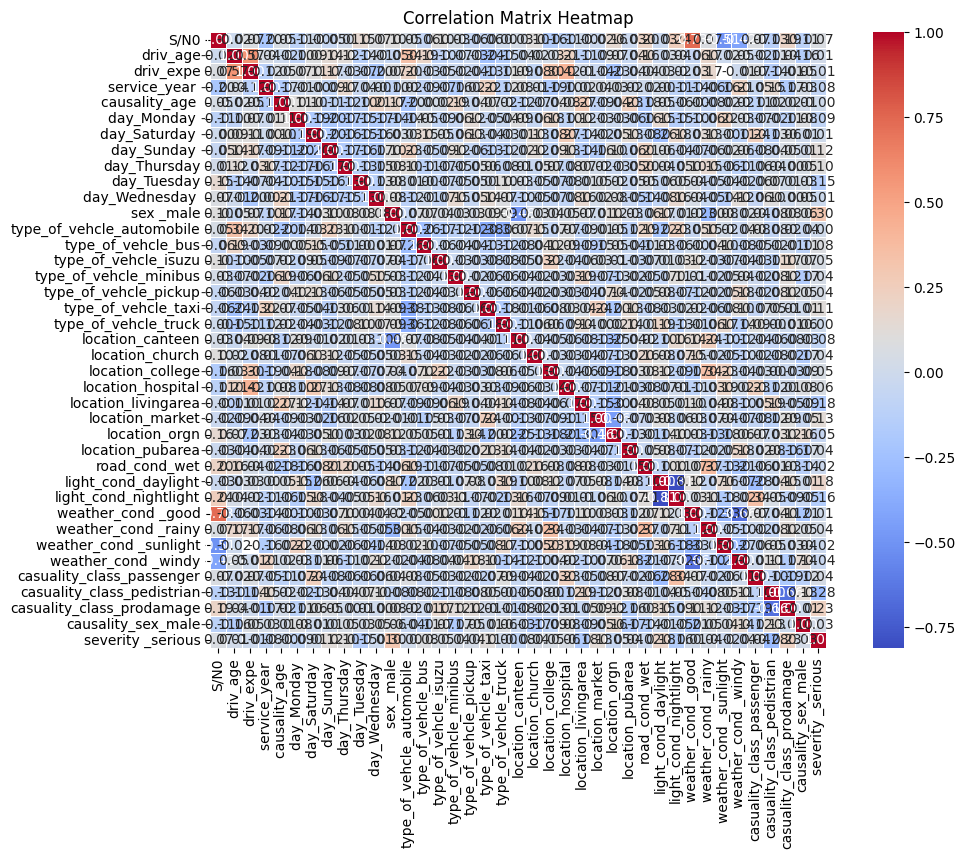

In [ ]:
# Step 1: Check for non-numeric columns
print("\nDataFrame Info:")
print(df.info())

# Using one-hot encoding for categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Calculate the correlation matrix on the numeric DataFrame
correlation_matrix = df_encoded.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 5: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Feature Selection
*Feature selection can significantly impact model interpretability, so it’s important to understand the implications of the selected features.*

Index(['s/n0', 'time', 'day', 'driv_age', 'sex', 'driv_expe', 'type_of_vehcle',
       'service_year', 'location', 'road_cond', 'light_cond', 'weather_cond',
       'casuality_class', 'causality_age', 'causality_sex', 'severity',
       'driv_age_encoded'],
      dtype='object')
No column containing 'target' found in DataFrame

Selected Features using Filter Method:
Index(['day_Sunday ', 'type_of_vehcle_automobile', 'type_of_vehcle_taxi',
       'location_livingarea', 'location_market', 'light_cond_daylight',
       'light_cond_nightlight', 'casuality_class_pedistrian',
       'casuality_class_prodamage', 'causality_sex_male'],
      dtype='object')


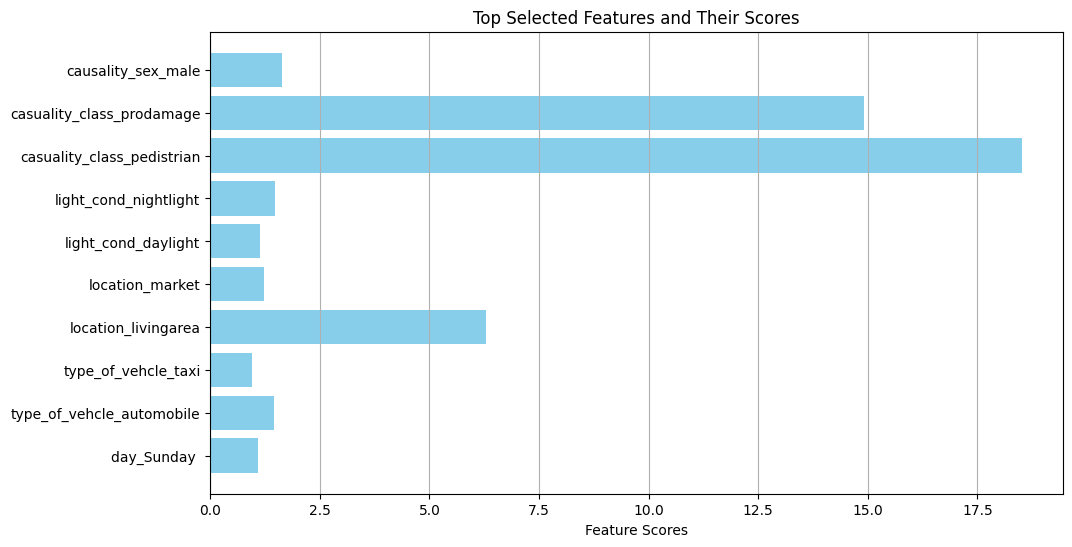

In [ ]:

print(data.columns)

# Check if 'target_variable' or a similar column exists
target_column = None
for col in data.columns:
    if 'target' in col.lower():  # Case-insensitive search for 'target'
        target_column = col
        break

if target_column:
    # Proceed with your code using the found column
    X = data.drop(target_column, axis=1)
    y = data[target_column]
else:
    print("No column containing 'target' found in DataFrame")

    target_column = 'severity'


# Split into features and target, Now use the identified target column
X = data.drop(target_column, axis=1)
y = data[target_column]
X = pd.get_dummies(X, drop_first=True)
# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features using Filter Method:")
print(selected_features)

feature_scores = selector.scores_[selector.get_support()]
plt.figure(figsize=(11, 6))
plt.barh(selected_features, feature_scores, color='skyblue')
plt.xlabel('Feature Scores')
plt.title('Top Selected Features and Their Scores')
plt.grid(axis='x')
plt.show()

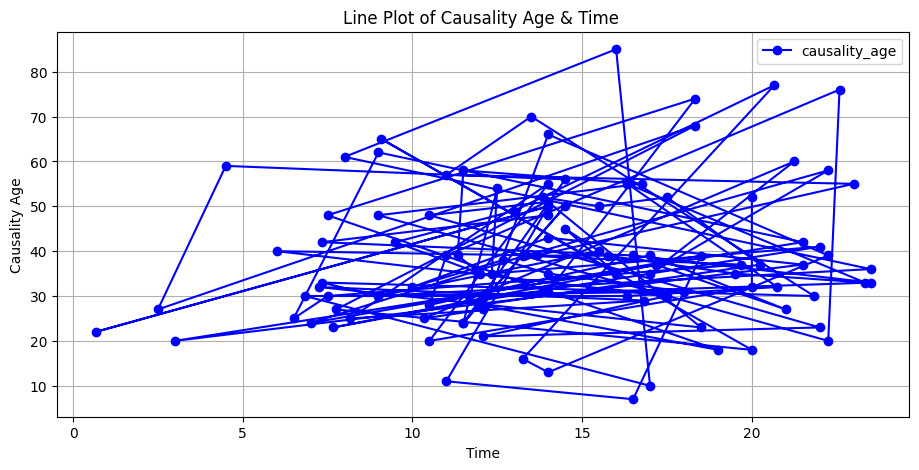

In [ ]:
if 'time' in data.columns and 'causality_age' in data.columns:
    plt.figure(figsize=(11, 5))

    # Create the line plot
    plt.plot(data['time'], data['causality_age'], marker='o', linestyle='-', color='b', label='causality_age')
    plt.title('Line Plot of Causality Age & Time ')
    plt.xlabel('Time')
    plt.ylabel('Causality Age')
    plt.grid(True)
    plt.legend()
    plt.show()
